# CLASSIFICATION 

In [1]:
## Importing tools for reading and processing the data
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing tools for graphs
import matplotlib.pyplot as plt
##used to create a simple line plot of the data
%matplotlib inline

## importing tools for metrix
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve

## importing tools for preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder

## for model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
## Read the file
df=sns.load_dataset('iris')

In [3]:
## checking sample
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
62,6.0,2.2,4.0,1.0,versicolor
25,5.0,3.0,1.6,0.2,setosa
83,6.0,2.7,5.1,1.6,versicolor
65,6.7,3.1,4.4,1.4,versicolor
142,5.8,2.7,5.1,1.9,virginica
44,5.1,3.8,1.9,0.4,setosa
55,5.7,2.8,4.5,1.3,versicolor
31,5.4,3.4,1.5,0.4,setosa
112,6.8,3.0,5.5,2.1,virginica


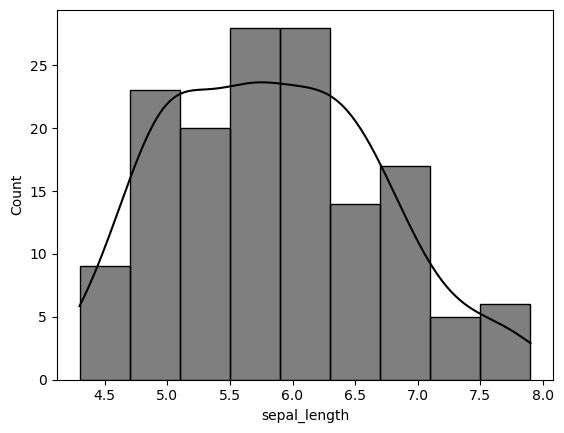

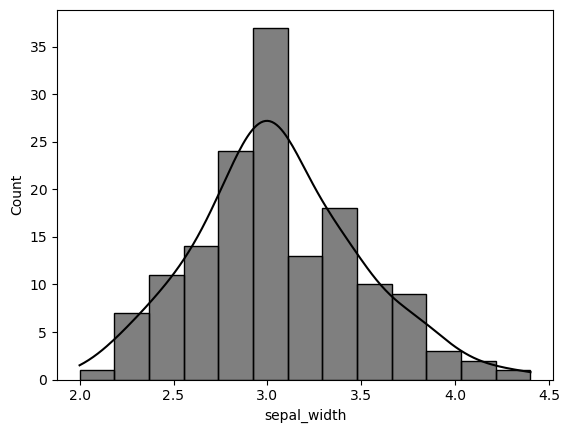

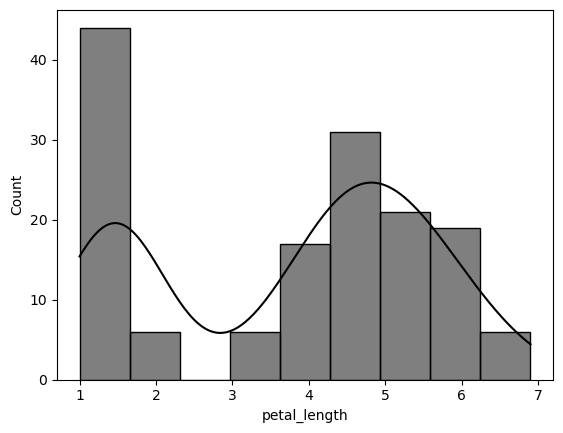

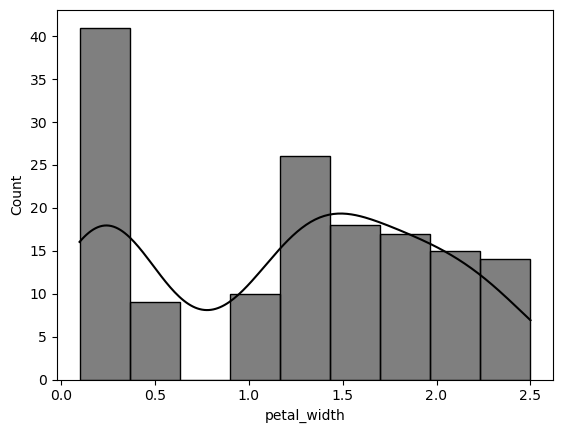

In [4]:
## creating a histplot 
for columns in df.columns:
    if df[columns].dtype !='object':
        sns.histplot(x=df[columns],kde=True,color='black')
        plt.show()

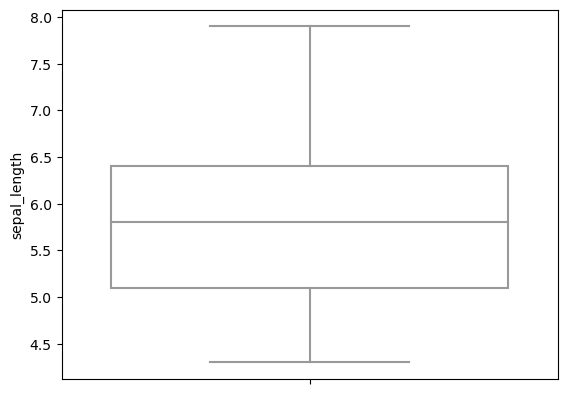

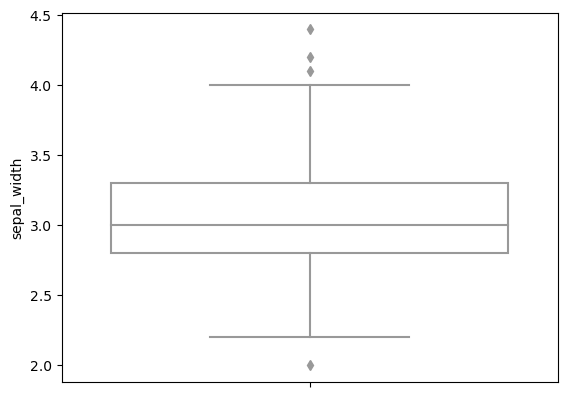

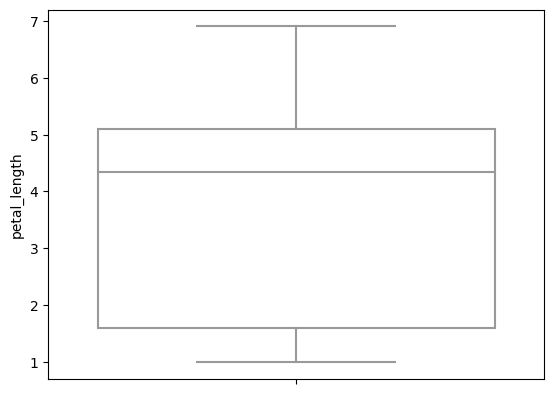

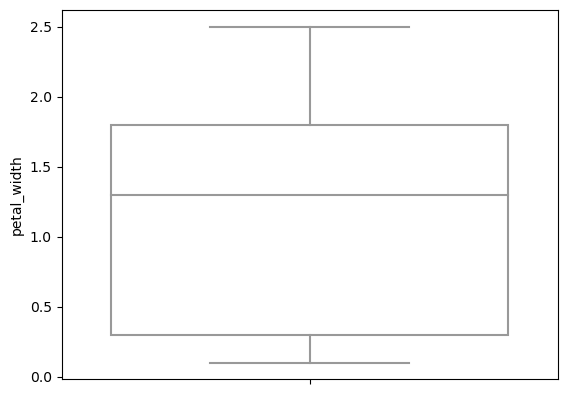

In [5]:
## creating a boxplot
for columns in df.columns:
    if df[columns].dtype != 'object':
        sns.boxplot(y=df[columns],color='white')
        plt.show()

In [6]:
## identify outliers is through the use of the interquartile range (IQR).
## UL = upper limit
## LL = lower limit

def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR = Q3 - Q1
    UL = Q3-1.5*IQR
    LL = Q1-1.5*Q1
    return UL,LL

In [7]:
## This code is trying to detect outliers in the numerical columns of a Pandas DataFrame df and replace them with NaN values.

##loop over columns in df
for  column  in df.columns:
    
    ##check if column is numerical
    if df[columns].dtype != 'object':
        
        ## check if column is numerical
        UL,LL = outlier_limit(df[columns])
        
        ## replace outliers with NaN
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

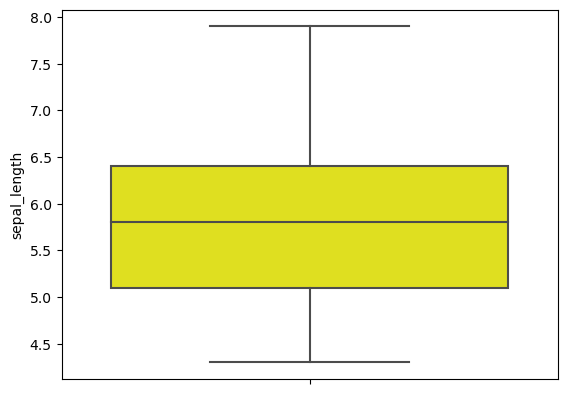

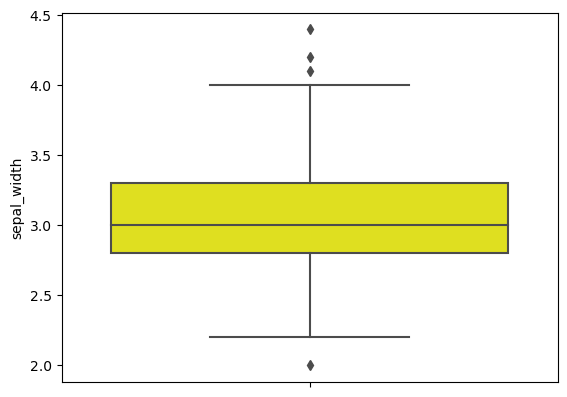

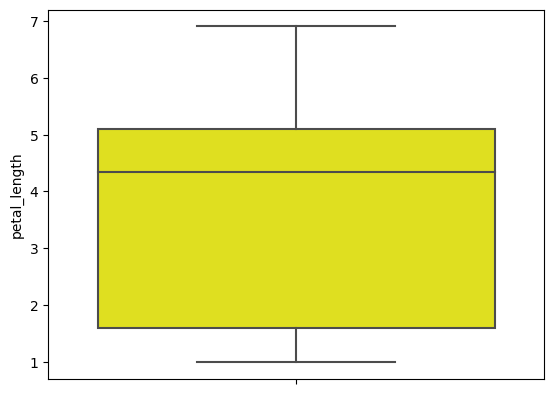

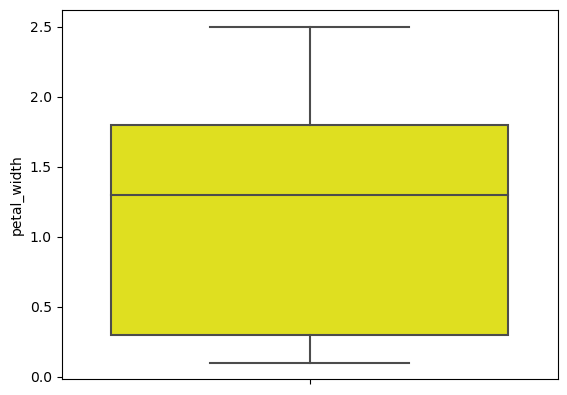

In [8]:
## creating a boxplot 

for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="yellow")
        plt.show()

In [9]:

## checking to any null values

df.isnull().sum()*100

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
## The code df.dropna(inplace=True) is used to remove rows containing missing or NaN values from a dataframe
## remove rows with missing values
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
## LabelEncoder() used for encoding categorical variables into numerical format.
le=LabelEncoder()

In [13]:
### fit and transform the categorical variable

df['species']= le.fit_transform(df['species'])

In [14]:
## checking sample of the data
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,2
35,5.0,3.2,1.2,0.2,0
112,6.8,3.0,5.5,2.1,2
139,6.9,3.1,5.4,2.1,2
115,6.4,3.2,5.3,2.3,2
16,5.4,3.9,1.3,0.4,0
76,6.8,2.8,4.8,1.4,1
116,6.5,3.0,5.5,1.8,2
5,5.4,3.9,1.7,0.4,0
8,4.4,2.9,1.4,0.2,0


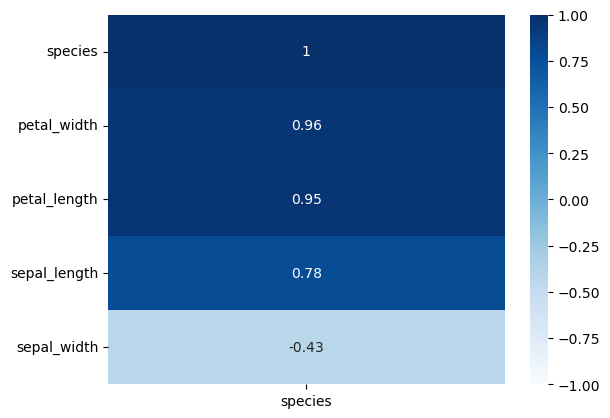

In [15]:
## create a heatmap of the correlation between the columns of a df(DataFrame)
## "df.corr()" calculates the correlation matrix of the df
## "sort_values(by="species", ascending=False" sorts the DataFrame by the correlation values in descending order.
## The "vmin=-1" and "vmax=1" parameters set the minimum and maximum values 
##  "annot=True" displays the correlation values in each cell of the heatmap.
## cmap="blues" color of the map

sns.heatmap(df.corr()[["species"]].sort_values(by="species", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

## SELECTING FEATURES BY iloc METHOD

In [16]:
## This code is used to split df into two arrays x and y,
## where x contains the feature data and y contains the target variable data.
## "df.iloc[:,:-1]" selects all rows and all columns except for the last column of the DataFrame df.
## "values" returns the underlying NumPy array of the DataFrame x and y
## "df.iloc[:,-1]" This creates a Series y containing only the target variable data

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## FEATURE SCALING

In [17]:
## StandardScaler() is used for standardizing features by removing the mean and scaling to unit variance.

sc=StandardScaler()

# fit and transform the features
x=sc.fit_transform(x)

## to split the dataset into training and testing sets.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [19]:
##Logistic regression is a supervised learning algorithm used for classification tasks.
## It is a type of regression analysis used to predict a binary or categorical outcome variable based on one or more predictor variables.
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.9583333333333334
Model accuracy on test is::  1.0
confusion_matrix train is::  [[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]
confusion_matrix test is::  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Wrong Predictions made: 0 / 30
************************************************************


In [21]:
OUTPUT=pd.DataFrame(zip(y,model.predict(x)),columns= ("ACTUAL","PREDICTION"), dtype=int)

In [22]:
df1=sns.load_dataset('iris')

In [23]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
OUTPUT

,ACTUAL,PREDICTION
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


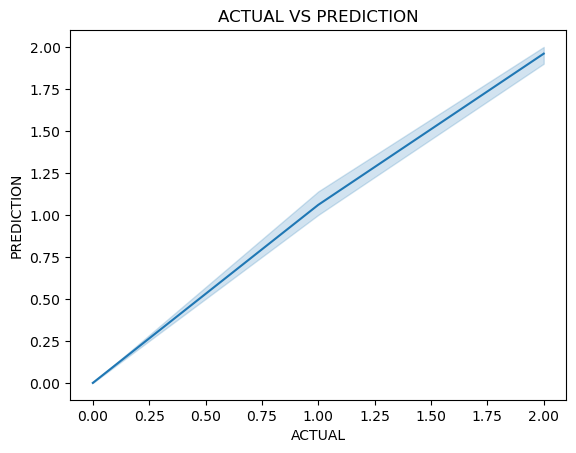

In [26]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()